<a href="https://colab.research.google.com/github//Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifying%20groceries%20using%20Monk%20in%205%20steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals



### Train a blood cell type classifier using resnet variants

### Understand what all differences happen when switching between resnets variants 

### Understand bigger and deeper network not always means better results

#### For this experiment you will be using mxnet backend

# What is resnet

## Readings on resnet

  1) Points from https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
    - The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers
    - The deeper model should not produce a training error higher than its shallower counterparts.
    - solves the problem of vanishing gradiens as network depth increased - https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257
    
    
 
  2) Points from https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624
    - Won 1st place in the ILSVRC 2015 classification competition with top-5 error rate of 3.57% (An ensemble model)
    - Efficiently trained networks with 100 layers and 1000 layers also.
    - Replacing VGG-16 layers in Faster R-CNN with ResNet-101. They observed a relative improvements of 28%
    

  3) Read more here
    - https://arxiv.org/abs/1512.03385
    - https://d2l.ai/chapter_convolutional-modern/resnet.html
    - https://cv-tricks.com/keras/understand-implement-resnets/
    - https://mc.ai/resnet-architecture-explained/




# Table of Contents


## [0. Install](#0)


## [1. Train experiment with resnet-18 architecture and validate](#1)


## [2. Train experiment with resnet-32 architecture and validate](#2)


## [3. Train experiment with resnet-50 architecture and validate](#3)


## [4. Train experiment with resnet-101 architecture and validate](#4)


## [5. Train experiment with resnet-152 architecture and validate](#5)


## [6. Compare all the 4 experiments](#11)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [5]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 2105 (delta 110), reused 116 (delta 53), pack-reused 1905
Receiving objects: 100% (2105/2105), 73.71 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (1130/1130), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

## Dataset - Blood Cell Type Classification
    - https://www.kaggle.com/paultimothymooney/blood-cells

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KhXKL58mnXL1G1uRDsCmCXMk7ubwXjps' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1KhXKL58mnXL1G1uRDsCmCXMk7ubwXjps" -O blood-cells.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq blood-cells.zip

# Imports

In [3]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [4]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Train experiment with resnet-18 architecture and validate

In [3]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet18-v1");


# Insert data and set params in default mode
gtf.Default(dataset_path="blood-cells/train", 
            model_name="resnet18_v1", 
            freeze_base_network=False,
            num_epochs=5);


Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet18-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet18-v1/

Dataset Details
    Train path:     blood-cells/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6969
    Num val images:   2988
    Num class

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [4]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed


Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.831, Train-loss: 0.478 | Val-acc: 0.939759, Val-loss: 0.193, | time: 49.3 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.952, Train-loss: 0.155 | Val-acc: 0.971553, Val-loss: 0.084, | time: 43.0 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.971, Train-loss: 0.102 | Val-acc: 0.982932, Val-loss: 0.065, | time: 43.4 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.982, Train-loss: 0.070 | Val-acc: 0.986948, Val-loss: 0.051, | time: 43.1 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.989, Train-loss: 0.044 | Val-acc: 0.989960, Val-loss: 0.044, | time: 44.0 sec

    Training completed in: 3m 42s
    Best val Acc:          0.989960

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet18-v1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet18-v1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Tra

<Figure size 432x288 with 0 Axes>

In [5]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet18-v1", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="blood-cells/val");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-v1-depth/resnet18-v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet18-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet18-v1/

Dataset Details
    Test path:      blood-cells/val
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 2487
    Num classes:      4

Testing



    Result
        class based accuracies
            0. EOSINOPHIL - 84.91171749598716 %
            1. LYMPHOCYTE - 100.0 %
            2. MONOCYTE - 75.0 %
            3. NEUTROPHIL - 92.62820512820514 %
        total images:            2487
        num correct predictions: 2192
        Average accuracy (%):    88.1383192601528



<a id='2'></a>
# Train experiment with resnet-34 architecture and validate

In [6]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet34-v1");


# Insert data and set params in default mode
gtf.Default(dataset_path="blood-cells/train", 
            model_name="resnet34_v1", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet34-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet34-v1/

Dataset Details
    Train path:     blood-cells/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6969
    Num val images:   2988
    Num class

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [7]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.814, Train-loss: 0.539 | Val-acc: 0.935074, Val-loss: 0.204, | time: 66.7 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.952, Train-loss: 0.153 | Val-acc: 0.973561, Val-loss: 0.103, | time: 65.3 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.974, Train-loss: 0.094 | Val-acc: 0.933735, Val-loss: 0.184, | time: 66.3 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.979, Train-loss: 0.075 | Val-acc: 0.964525, Val-loss: 0.113, | time: 67.1 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.990, Train-loss: 0.040 | Val-acc: 0.988621, Val-loss: 0.034, | time: 68.1 sec

    Training completed in: 5m 32s
    Best val Acc:          0.988621

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet34-v1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet34-v1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Tra

<Figure size 432x288 with 0 Axes>

In [8]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet34-v1", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="blood-cells/val");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-v1-depth/resnet34-v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet34-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet34-v1/

Dataset Details
    Test path:      blood-cells/val
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 2487
    Num classes:      4

Testing



    Result
        class based accuracies
            0. EOSINOPHIL - 86.19582664526484 %
            1. LYMPHOCYTE - 100.0 %
            2. MONOCYTE - 75.0 %
            3. NEUTROPHIL - 88.78205128205127 %
        total images:            2487
        num correct predictions: 2176
        Average accuracy (%):    87.49497386409328



<a id='3'></a>
# Train experiment with resnet-50 architecture and validate

In [5]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet50-v1");


# Insert data and set params in default mode
gtf.Default(dataset_path="blood-cells/train", 
            model_name="resnet50_v1", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet50-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet50-v1/

Dataset Details
    Train path:     blood-cells/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6969
    Num val images:   2988
    Num class

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [6]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.874, Train-loss: 0.326 | Val-acc: 0.955823, Val-loss: 0.126, | time: 109.1 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.978, Train-loss: 0.077 | Val-acc: 0.989960, Val-loss: 0.032, | time: 108.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.992, Train-loss: 0.024 | Val-acc: 0.945783, Val-loss: 0.153, | time: 107.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.994, Train-loss: 0.021 | Val-acc: 0.988286, Val-loss: 0.030, | time: 108.1 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.997, Train-loss: 0.010 | Val-acc: 0.997323, Val-loss: 0.008, | time: 107.8 sec

    Training completed in: 8m 59s
    Best val Acc:          0.997323

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet50-v1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet50-v1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Tr

<Figure size 432x288 with 0 Axes>

In [11]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet50-v1", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="blood-cells/val");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-v1-depth/resnet50-v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet50-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet50-v1/

Dataset Details
    Test path:      blood-cells/val
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 2487
    Num classes:      4

Testing



    Result
        class based accuracies
            0. EOSINOPHIL - 85.87479935794543 %
            1. LYMPHOCYTE - 100.0 %
            2. MONOCYTE - 75.0 %
            3. NEUTROPHIL - 92.94871794871796 %
        total images:            2487
        num correct predictions: 2200
        Average accuracy (%):    88.45999195818254



<a id='4'></a>
# Train experiment with resnet-101 architecture and validate

In [12]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet101-v1");


# Insert data and set params in default mode
gtf.Default(dataset_path="blood-cells/train", 
            model_name="resnet101_v1", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet101-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet101-v1/

Dataset Details
    Train path:     blood-cells/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6969
    Num val images:   2988
    Num cla

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [13]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.823, Train-loss: 0.481 | Val-acc: 0.927376, Val-loss: 0.218, | time: 179.0 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.950, Train-loss: 0.172 | Val-acc: 0.965863, Val-loss: 0.111, | time: 180.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.976, Train-loss: 0.081 | Val-acc: 0.988621, Val-loss: 0.041, | time: 180.6 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.984, Train-loss: 0.062 | Val-acc: 0.990964, Val-loss: 0.038, | time: 179.8 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.992, Train-loss: 0.034 | Val-acc: 0.991633, Val-loss: 0.035, | time: 178.5 sec

    Training completed in: 14m 55s
    Best val Acc:          0.991633

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet101-v1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet101-v1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 -

<Figure size 432x288 with 0 Axes>

In [14]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet101-v1", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="blood-cells/val");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-v1-depth/resnet101-v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet101-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet101-v1/

Dataset Details
    Test path:      blood-cells/val
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 2487
    Num classes:      4

Testing



    Result
        class based accuracies
            0. EOSINOPHIL - 82.6645264847512 %
            1. LYMPHOCYTE - 100.0 %
            2. MONOCYTE - 75.16129032258064 %
            3. NEUTROPHIL - 87.33974358974359 %
        total images:            2487
        num correct predictions: 2146
        Average accuracy (%):    86.28870124648171



<a id='5'></a>
# Train experiment with resnet-152 architecture and validate

In [15]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet152-v1");


# Insert data and set params in default mode
gtf.Default(dataset_path="blood-cells/train", 
            model_name="resnet152_v1", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet152-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet152-v1/

Dataset Details
    Train path:     blood-cells/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6969
    Num val images:   2988
    Num cla

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [16]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.893, Train-loss: 0.288 | Val-acc: 0.970549, Val-loss: 0.085, | time: 255.6 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.987, Train-loss: 0.041 | Val-acc: 0.990629, Val-loss: 0.028, | time: 259.6 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.992, Train-loss: 0.027 | Val-acc: 0.993307, Val-loss: 0.021, | time: 254.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.998, Train-loss: 0.007 | Val-acc: 0.996653, Val-loss: 0.010, | time: 261.4 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.998, Train-loss: 0.007 | Val-acc: 0.997992, Val-loss: 0.007, | time: 261.3 sec

    Training completed in: 21m 26s
    Best val Acc:          0.997992

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet152-v1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet152-v1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 -

<Figure size 432x288 with 0 Axes>

In [17]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-depth", "resnet152-v1", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="blood-cells/val");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-resnet-v1-depth/resnet152-v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-depth
    Experiment: resnet152-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-depth/resnet152-v1/

Dataset Details
    Test path:      blood-cells/val
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 2487
    Num classes:      4

Testing



    Result
        class based accuracies
            0. EOSINOPHIL - 79.61476725521669 %
            1. LYMPHOCYTE - 97.90322580645162 %
            2. MONOCYTE - 75.0 %
            3. NEUTROPHIL - 90.7051282051282 %
        total images:            2487
        num correct predictions: 2134
        Average accuracy (%):    85.80619219943706



<a id='11'></a>
# Comparing all the experiments

In [18]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [19]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-network-depth");

Comparison: - Compare-effect-of-network-depth


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-network-depth
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [20]:
gtf.Add_Experiment("Compare-resnet-v1-depth", "resnet18-v1");
gtf.Add_Experiment("Compare-resnet-v1-depth", "resnet34-v1");
gtf.Add_Experiment("Compare-resnet-v1-depth", "resnet50-v1");
gtf.Add_Experiment("Compare-resnet-v1-depth", "resnet101-v1");
gtf.Add_Experiment("Compare-resnet-v1-depth", "resnet152-v1");

Project - Compare-resnet-v1-depth, Experiment - resnet18-v1 added
Project - Compare-resnet-v1-depth, Experiment - resnet34-v1 added
Project - Compare-resnet-v1-depth, Experiment - resnet50-v1 added
Project - Compare-resnet-v1-depth, Experiment - resnet101-v1 added
Project - Compare-resnet-v1-depth, Experiment - resnet152-v1 added


## Run Analysis

In [21]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

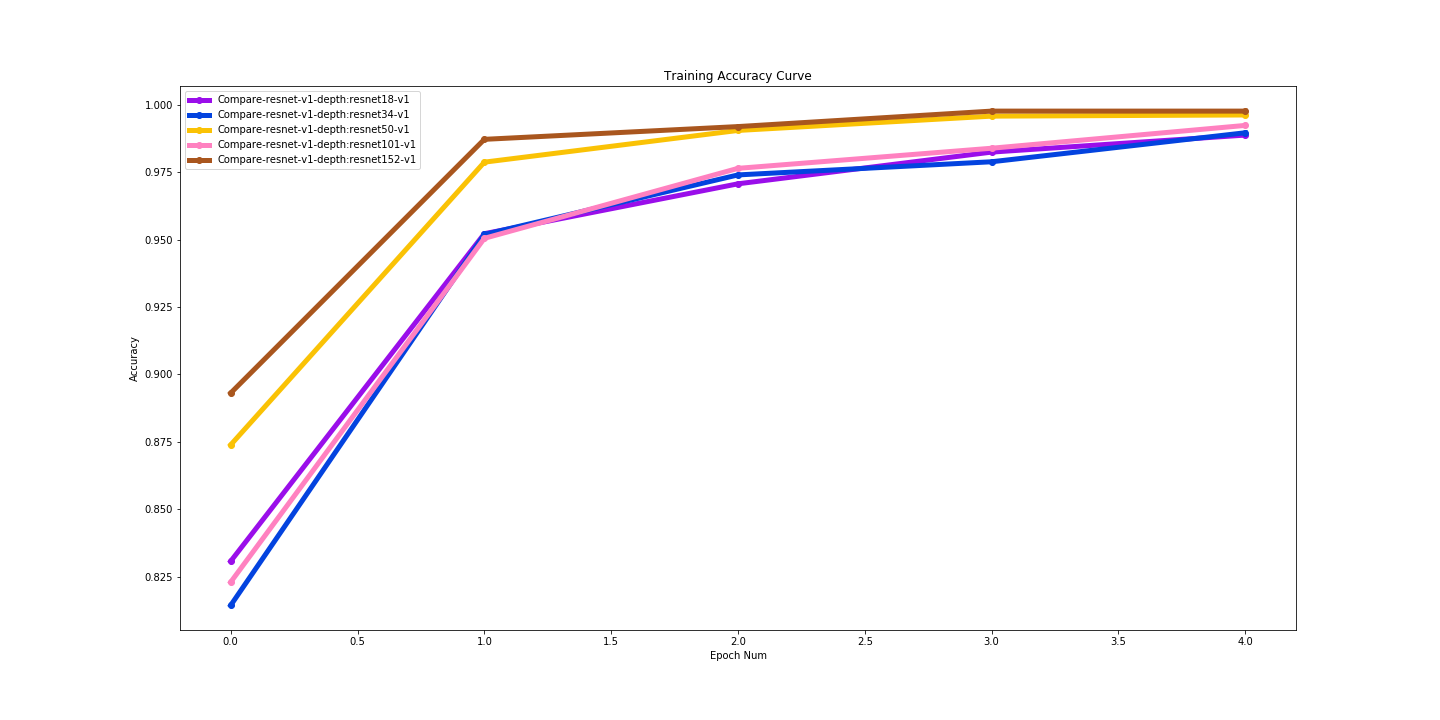

In [22]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/train_accuracy.png") 

### Training Loss Curves

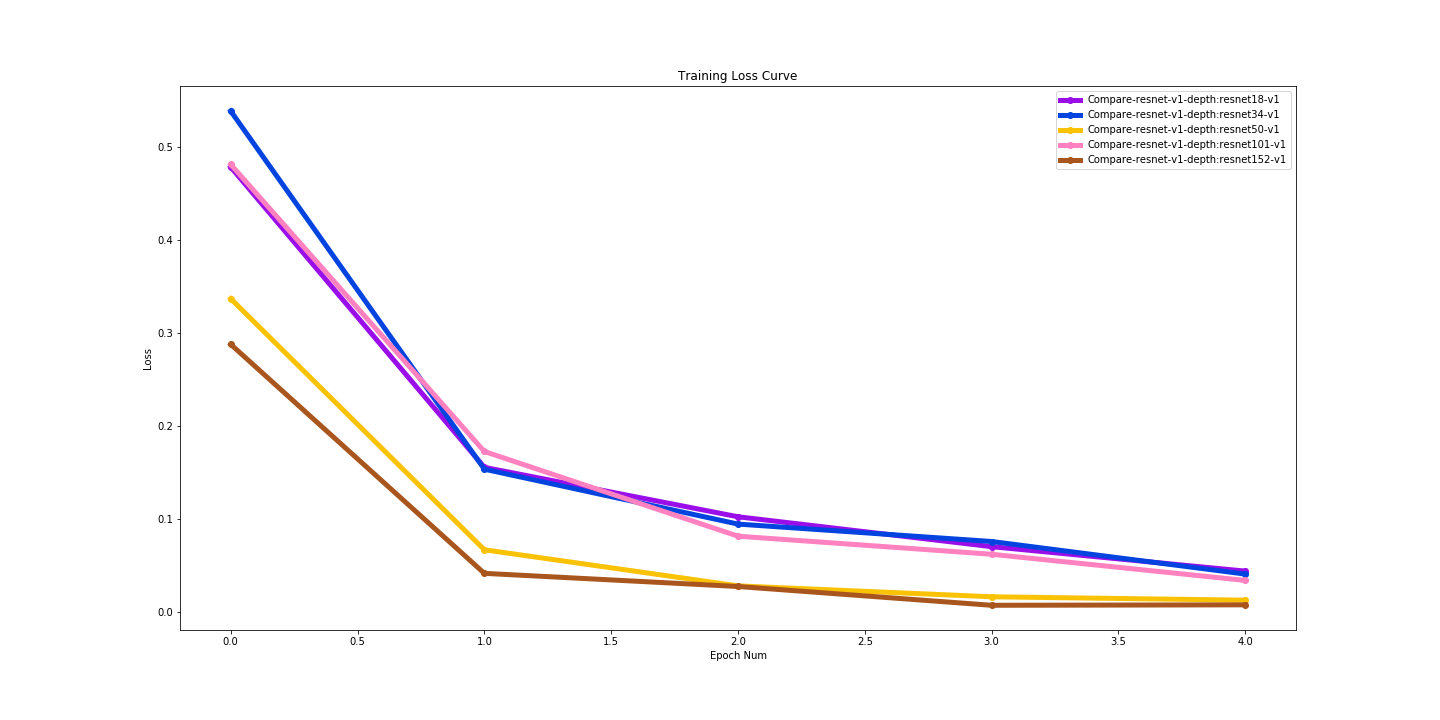

In [23]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/train_loss.png") 

### Validation Accuracy Curves

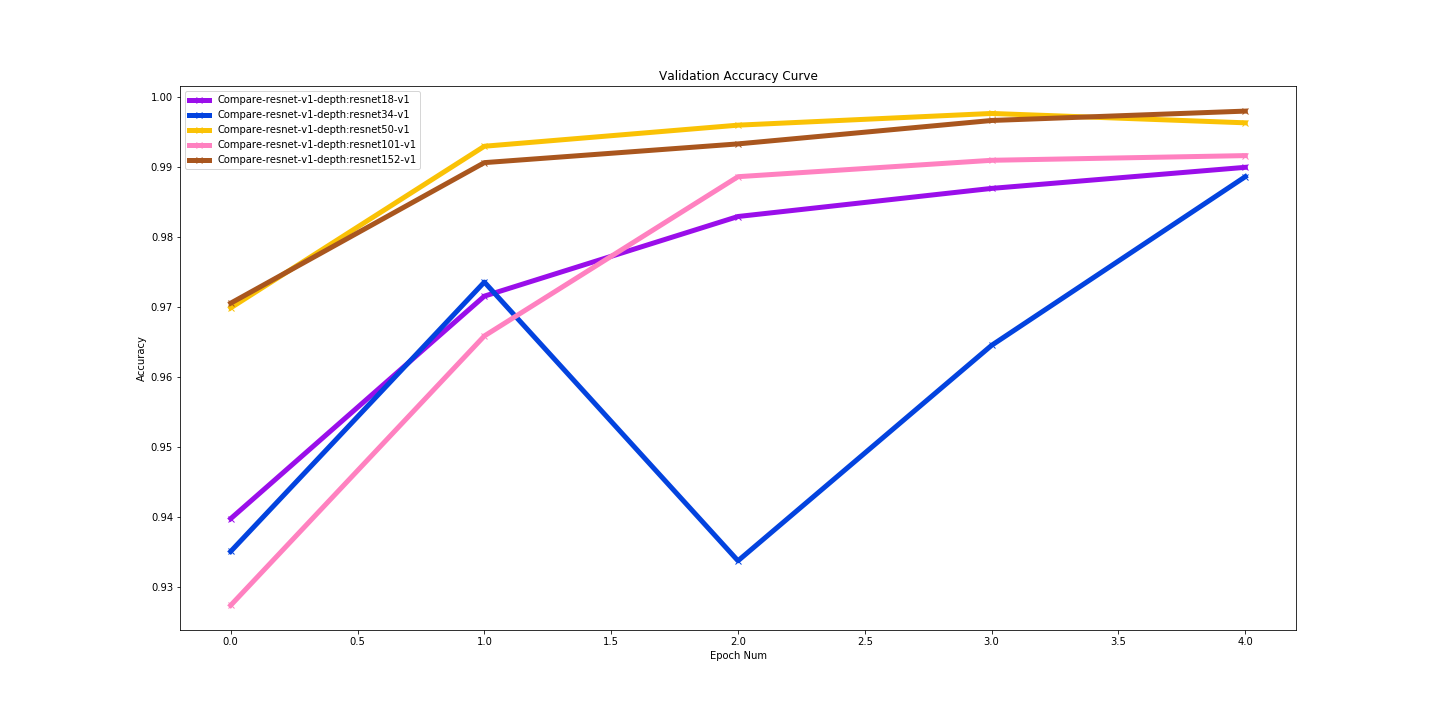

In [24]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/val_accuracy.png") 

### Validation loss curves

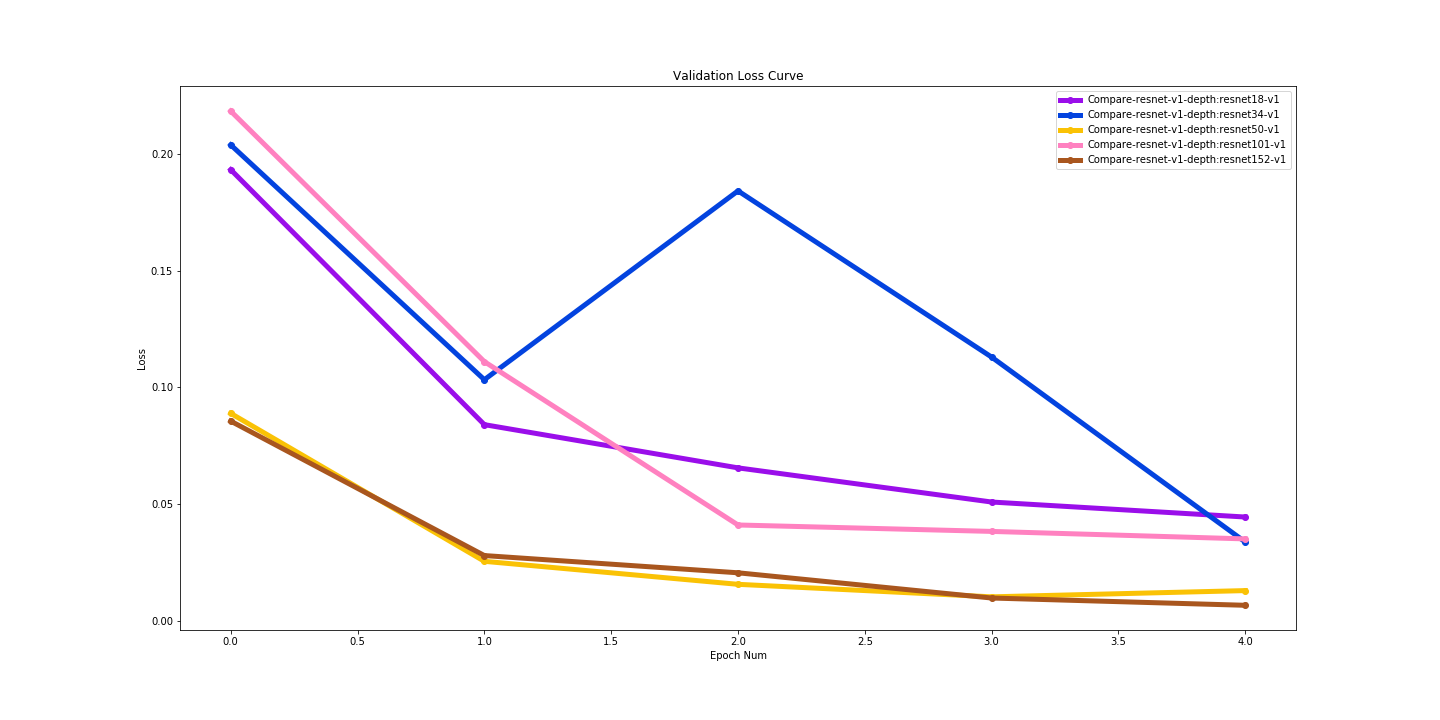

In [25]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/val_loss.png") 

### Training Times and max gpu usages

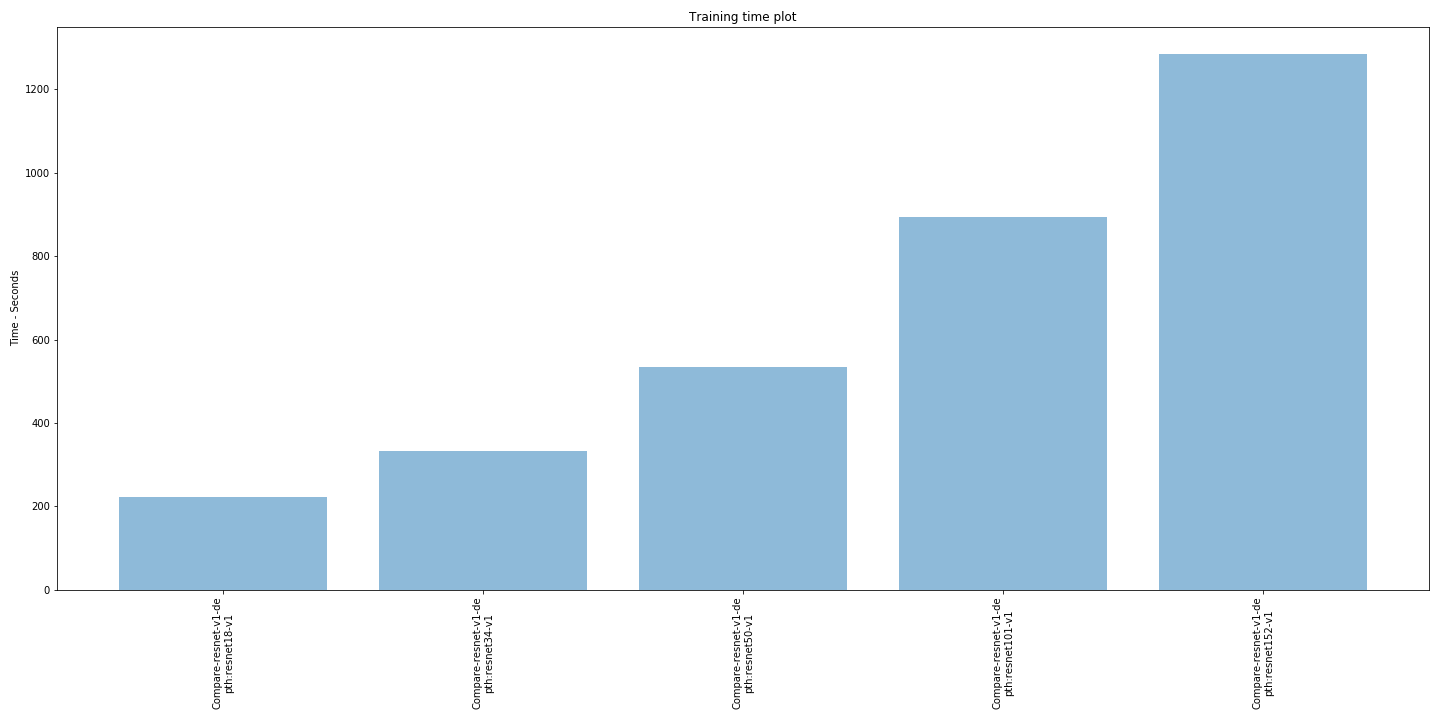

In [26]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/stats_training_time.png") 

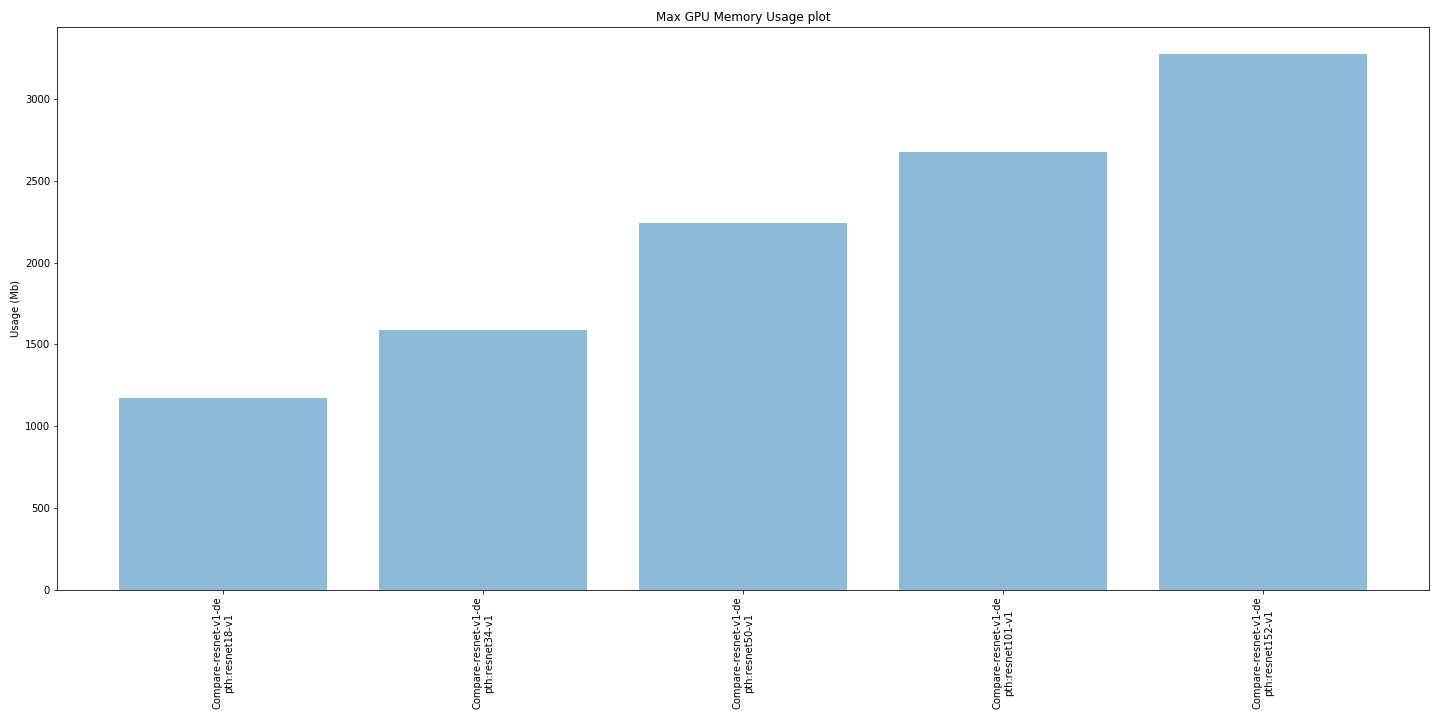

In [27]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/stats_max_gpu_usage.png") 

# Comparisons 
#### You may get differet results

    Network      | Val Acc | Training time (sec)  |  Gpu Usage (mb)
    
    
    resnet-18    |  88.1   |        220           |       1250
    
    
    resnet-34    |  87.4   |        310           |       1600
    
    
    
    resnet-50    |  88.4   |        580           |       2250
    
    
    
    resnet-101   |  86.2   |        840           |       2600
    
    
    
    resnet-152   |  85.8   |        1120          |       3700
    
    
    